In [1]:
#importing nirt fp-lpa dataset
import pandas as pd

# Specify the file path
file_path = r'C:\Users\harshvats\Downloads\ORF external Eval Combined file.xlsx'

# Read the Excel file into a DataFrame
try:
    df = pd.read_excel(file_path)

    # Display the variable headers
    variable_headers = df.columns.tolist()
    print("Variable Headers:")
    for header in variable_headers:
        print(header)

except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at path {file_path} is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing Excel file: {e}")
    
#replicate into other files
# need to write the statistical analysis paragraph 
#need to collate first line of drug and second line of drug onto ROC and PR curve

Variable Headers:
ID
Grade
GS
final_word
final_op
write correct output
Evaluated_OP


In [2]:
print(df.columns)

Index(['ID', 'Grade', 'GS', 'final_word', 'final_op', 'write correct output',
       'Evaluated_OP'],
      dtype='object')


In [3]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['ID', 'Grade', 'GS', 'final_word', 'final_op', 'write correct output',
                    'Evaluated_OP'],
# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df[header].value_counts())
    print("\n")


Variable: ['ID', 'Grade', 'GS', 'final_word', 'final_op', 'write correct output', 'Evaluated_OP']
ID     Grade  GS  final_word  final_op  write correct output  Evaluated_OP
36085  4      1   ****        DEL       HIT                   HIT             16
71937  7      1   ****        DEL       HIT                   HIT              8
48417  3      1   ****        DEL       HIT                   HIT              6
30979  4      1   ****        DEL       HIT                   HIT              6
74413  6      2   ****        DEL       HIT                   HIT              4
                                                                              ..
47848  3      3   એક્સપ્રેશ   SUB       HIT                   HIT              1
47771  5      1   વર્ષ        SUB       HIT                   HIT              1
                  માડા        SUB       HIT                   HIT              1
                  ભરા         SUB       HIT                   HIT              1
96855  8      2  

In [4]:
print(df['final_op'].value_counts())

final_op
HIT    23802
SUB    14089
INS     1501
DEL     1459
Name: count, dtype: int64


In [5]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df['final_op'] = df['final_op'].replace({
    'SUB': 'Not HIT',
    'INS': 'Not HIT',
    'DEL': 'Not HIT'
})

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: final_op")
print(df['final_op'].value_counts())

Variable: final_op
final_op
HIT        23802
Not HIT    17049
Name: count, dtype: int64


In [6]:

print(df['Evaluated_OP'].value_counts())

Evaluated_OP
HIT     28772
SUB      9318
INS      1473
DEL      1287
 HIT        1
Name: count, dtype: int64


In [7]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df['Evaluated_OP'] = df['Evaluated_OP'].replace({
    'SUB': 'Not HIT',
    'INS': 'Not HIT',
    'DEL': 'Not HIT',
    ' HIT': 'Not HIT'
})

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Evaluated_OP")
print(df['Evaluated_OP'].value_counts())

Variable: Evaluated_OP
Evaluated_OP
HIT        28772
Not HIT    12079
Name: count, dtype: int64


In [9]:
# Replace values in Sample condition_AI
df['final_op'] = df['final_op'].replace({
    'Not HIT': 0,
    'HIT': 1
})

# Replace values in Resistance to Rifampicin (RpoB)_AI
df['Evaluated_OP'] = df['Evaluated_OP'].replace({
    'Not HIT': 0,
    'HIT': 1
})

In [10]:
# Print the updated DataFrame
print(df)


          ID  Grade  GS         final_word  final_op write correct output  \
0      76609      8   1             પોતાની         1                  NaN   
1      76609      8   1               મેરી         0                  NaN   
2      76609      8   1  ચાલી પુટી તળાવીને         0                  HIT   
3      76609      8   1               મળવા         1                  NaN   
4      76609      8   1           આવેરહેલા         0                  HIT   
...      ...    ...  ..                ...       ...                  ...   
40846  59993      4   3                સરસ         1                  NaN   
40847  59993      4   3             મજાનું         0                  HIT   
40848  59993      4   3               ****         0                  NaN   
40849  59993      4   3                 ફળ         0                  NaN   
40850  59993      4   3                 છે         0                  NaN   

       Evaluated_OP  
0                 1  
1                 0  
2        

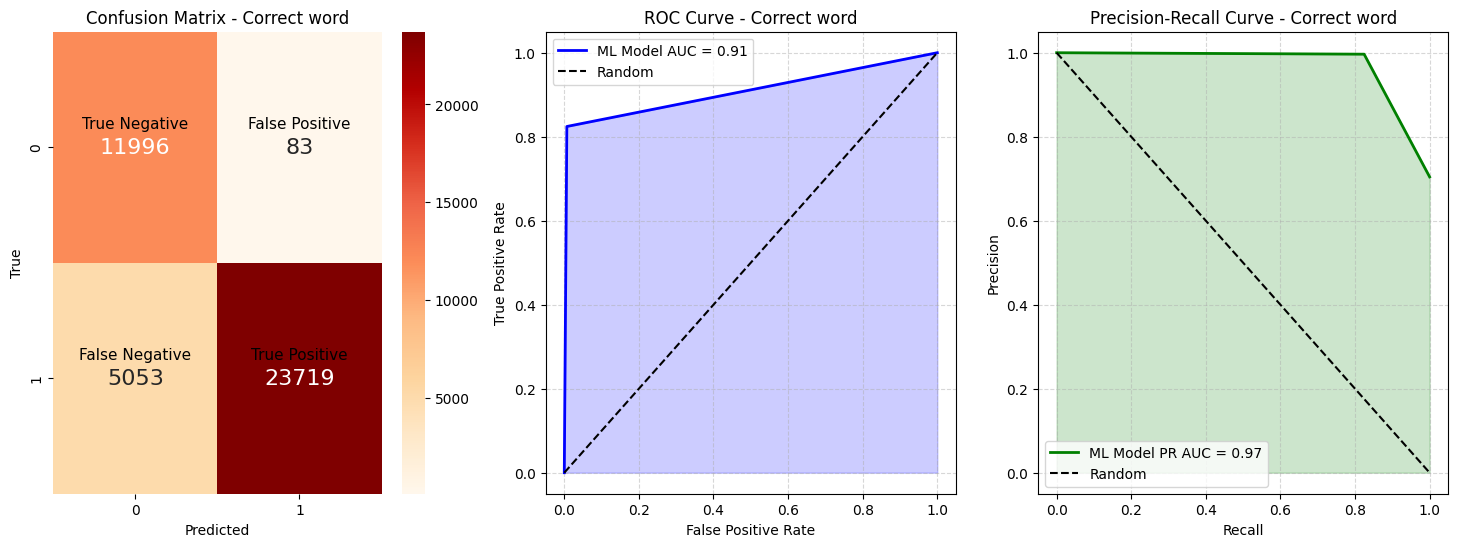

Classification Report - Correct word

              precision    recall  f1-score   support

           0       0.70      0.99      0.82     12079
           1       1.00      0.82      0.90     28772

    accuracy                           0.87     40851
   macro avg       0.85      0.91      0.86     40851
weighted avg       0.91      0.87      0.88     40851

Sensitivity: 0.82
Specificity: 0.99
NPV: 0.70
PPV: 1.00
Cohen's Kappa: 0.73
Fowlkes-Mallows Score: 0.80
Matthews Correlation Coefficient: 0.76


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0

    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)

    return sensitivity, specificity, npv, ppv, kappa, fowlkes_mallows, matthews_corr

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.2f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.2f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, kappa, fowlkes_mallows, matthews_corr = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print(f'NPV: {npv:.2f}')
    print(f'PPV: {ppv:.2f}')
    print(f'Cohen\'s Kappa: {kappa:.2f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.2f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.2f}')


# Gold Standard vs ML Model for Sample condition
evaluate_model(df['Evaluated_OP'], df['final_op'], 'Correct word')




In [19]:
#importing nirt fp-lpa dataset
import pandas as pd

# Specify the file path
file_path = r'C:\Users\harshvats\Downloads\ORF external Eval Combined file.xlsx'

# Read the Excel file into a DataFrame
try:
    df_1 = pd.read_excel(file_path)

    # Display the variable headers
    variable_headers = df_1.columns.tolist()
    print("Variable Headers:")
    for header in variable_headers:
        print(header)

except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at path {file_path} is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing Excel file: {e}")
    
#replicate into other files
# need to write the statistical analysis paragraph 
#need to collate first line of drug and second line of drug onto ROC and PR curve

Variable Headers:
ID
Grade
GS
final_word
final_op
write correct output
Evaluated_OP


In [20]:
print(df_1['final_op'].value_counts())

final_op
HIT    23802
SUB    14089
INS     1501
DEL     1459
Name: count, dtype: int64


In [21]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df_1['final_op'] = df_1['final_op'].replace({
    'HIT': 'Not SUB',
    'INS': 'Not SUB',
    'DEL': 'Not SUB'
})

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: final_op")
print(df_1['final_op'].value_counts())

Variable: final_op
final_op
Not SUB    26762
SUB        14089
Name: count, dtype: int64


In [23]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df_1['Evaluated_OP'] = df_1['Evaluated_OP'].replace({
    'HIT': 'Not SUB',
    'INS': 'Not SUB',
    'DEL': 'Not SUB',
    ' HIT': 'Not SUB'
})

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Evaluated_OP")
print(df_1['Evaluated_OP'].value_counts())

Variable: Evaluated_OP
Evaluated_OP
Not SUB    31533
SUB         9318
Name: count, dtype: int64
